In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
import sklearn
# Load a classification data set
data=pd.read_csv('claim_API.csv')

# Specify the features of interest and the target
target = "FraudFound_P"
features = [col for col in data.columns if col != target]

In [9]:
# Encode the categorical data with one-hot encoding
X = pd.get_dummies(data[features])
y = data[target]
y.dtypes

sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [14]:
train_sizes = [1, 100, 500, 2000, 5000, 7000, 8000, 10395]

In [11]:
data.shape

(12995, 12)

In [15]:
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = RandomForestClassifier(), X = X,
                                                   y = y, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'accuracy')

/home/maddy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/maddy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/maddy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/maddy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/maddy/.local/lib/python3.6/site-packages/sklearn/ensem

/home/maddy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/maddy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/maddy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/maddy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [0.99442857 0.98385714 0.98314286 0.98485714 0.98228571]
 [0.994375   0.984375   0.983625   0.985375   0.986     ]
 [0.99268879 0.98710919 0.98922559 0.98835979 0.98768639]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.50269231 0.50288573 0.50288573 0.50288573 0.50269438]
 [0.50269231 0.50288573 0.50288573 0.50288573 0.50269438]
 [0.50269231 0.50288573 0.50288573 0.50288573 0.50269438]
 [0.50269231 0.50288573 0.50288573 0.50288573 0.50269438]
 [0.50269231 0.50288573 0.50288573 0.50288573 0.50269438]
 [0.63461538 0.84340131 0.8287803  0.84301654 0.83140878]
 [0.635      0.85378992 0.87610619 0.85032705 0.84488068]
 [0.65653846 0.

In [17]:
#Print mean scores
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -1.000000
100     -1.000000
500     -1.000000
2000    -1.000000
5000    -1.000000
7000    -0.985714
8000    -0.986750
10395   -0.989014
dtype: float64

 --------------------

Mean validation scores

 1       -0.502809
100     -0.502809
500     -0.502809
2000    -0.502809
5000    -0.502809
7000    -0.796244
8000    -0.812021
10395   -0.838955
dtype: float64


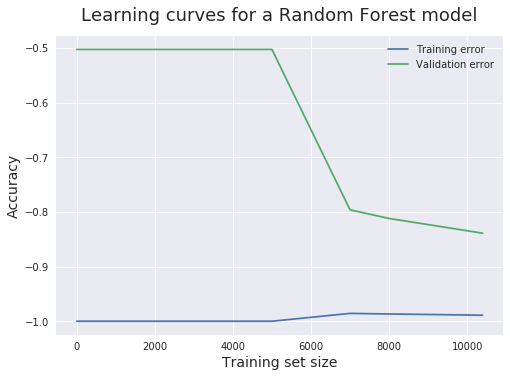

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(-50,50)


In [29]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=500, max_depth=5,
                        objective='binary:logistic', random_state=42)

In [30]:
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = model, X = X,
                                                   y = y, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'balanced_accuracy')

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


Training scores:

 [[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [0.99567422 0.87150637 0.87149644 0.87684963 0.87191106]
 [0.99575721 0.91403356 0.91861497 0.91202476 0.91624395]
 [0.99651812 0.9471852  0.94988981 0.95123228 0.95159829]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.5        0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.6102461  0.87020888 0.88918949 0.88381595 0.88956365]
 [0.61215887 0.89116889 0.93138992 0.92101207 0.92401052]
 [0.61992596 0.

In [31]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -1.000000
100     -1.000000
500     -1.000000
2000    -1.000000
5000    -1.000000
7000    -0.897488
8000    -0.931335
10395   -0.959285
dtype: float64

 --------------------

Mean validation scores

 1       -0.500000
100     -0.500000
500     -0.500000
2000    -0.500000
5000    -0.500000
7000    -0.828605
8000    -0.855948
10395   -0.873635
dtype: float64


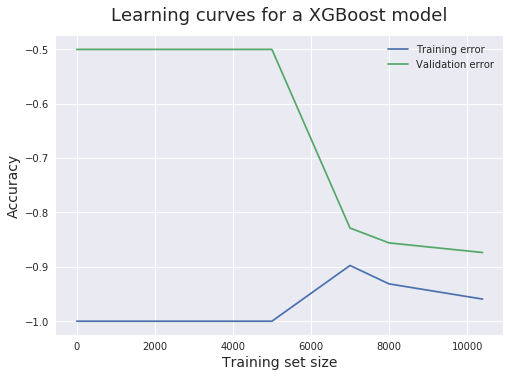

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a XGBoost model', fontsize = 18, y = 1.03)
plt.legend()

In [43]:
import lightgbm as lgb
model2 = lgb.LGBMClassifier(n_estimators=100, max_depth=7)

In [44]:
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = model2, X = X,
                                                   y = y, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'balanced_accuracy')

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [0.96996187 0.80274246 0.79455927 0.7991472  0.79399971]
 [0.97021668 0.86822127 0.85771926 0.8538007  0.86126319]
 [0.97148454 0.90781352 0.90616223 0.90761128 0.90997858]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.5        0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5       ]
 [0.5944122  0.84965807 0.88213916 0.87250865 0.87360551]
 [0.60216687 0.85976884 0.92204426 0.891934   0.89925102]
 [0.61851586 0.

In [45]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -1.000000
100     -1.000000
500     -1.000000
2000    -1.000000
5000    -1.000000
7000    -0.832082
8000    -0.882244
10395   -0.920610
dtype: float64

 --------------------

Mean validation scores

 1       -0.500000
100     -0.500000
500     -0.500000
2000    -0.500000
5000    -0.500000
7000    -0.814465
8000    -0.835033
10395   -0.849722
dtype: float64


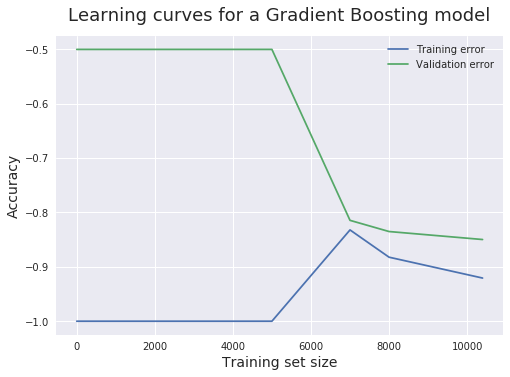

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Gradient Boosting model', fontsize = 18, y = 1.03)
plt.legend()